In [33]:
%pylab inline
from astroML.density_estimation import KDE, KNeighborsDensity
from astropy.io import fits
from density_tools import density_peaks

Populating the interactive namespace from numpy and matplotlib


In [34]:
def read_data(data):
    leo1 = fits.open(data)
    t = leo1[1].data
    ra_leo1 = t['ra']
    dec_leo1 = t['dec']
    return ra_leo1, dec_leo1

In [35]:
ra_leo1, dec_leo1 = read_data('../data/sdss_fields/draco.fits')

In [36]:
def NN_bayesian_density(x, y, NN, grid_size):
    """
    Function to compute the density of a distribution of particles using the K-Nearest Neighboors
    method from: http://www.astroml.org/modules/generated/astroML.density_estimation.KNeighborsDensity.html#astroML.density_estimation.KNeighborsDensity
    
    See Ivezic 10? for the details on how the algorithm works.
    
    Input:
    ------
    x : 1D numpy.array
        Array with the x-coordinates of the data.
    y : 1D numpy.array
        Array with the y-coordinates of the data.
    NN : int
        Number of neighboors to compute the desnity.
    grid_size : int
        Grid size in which the density is going to be evaluated.
        
    """
    assert len(x)==len(y), "Input data have different size"
    assert type(NN) == int, "NN should be of type int"
    assert type(grid_size) == int, "grid_zise should be of type int"
    
    # Grid parameters
    Nx = grid_size
    Ny = grid_size
    xmin, xmax = (min(x), max(x))
    ymin, ymax = (min(y), max(y))

    # Making a grid
    Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                                np.linspace(ymin, ymax, Ny)))).T
    # Putting data in 2d-array
    X = np.array([x, y]).T
    
    # Computing the density
    knn = KNeighborsDensity('bayesian', NN)
    dens_KNN = knn.fit(X).eval(Xgrid).reshape((Ny, Nx))
    
    return dens_KNN

    
    

In [44]:
dens_leo1 = NN_bayesian_density(ra_leo1, dec_leo1, 20, 500)

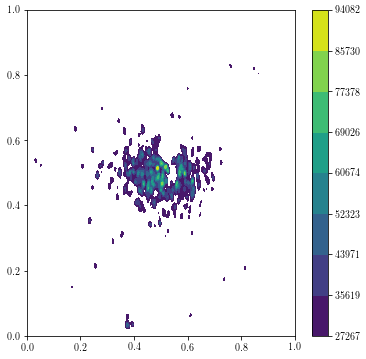

In [47]:
density_peaks(dens_leo1, 10, 2)